## House Price Prediction using Ensemble Methods

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [4]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/House Price Prediction Dataset.csv')
df.shape


(2000, 10)

## Data Preprocessing

In [5]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Dataset shape: (2000, 10)

Missing values:
 Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

Data types:
 Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object


In [7]:
df_clean = df.dropna()
print(f"Rows after removing NaN: {df_clean.shape[0]}")

X = df_clean.drop(df_clean.columns[-1], axis=1)
y = df_clean.iloc[:, -1]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

Rows after removing NaN: 2000
Train set: (1600, 13)
Test set: (400, 13)


## Training and Evaluation

In [8]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf', C=100)

voting_reg = VotingRegressor([('lr', lr), ('rf', rf), ('gb', gb), ('svr', svr)])

voting_reg.fit(X_train_scaled, y_train)
y_pred = voting_reg.predict(X_test_scaled)

print(f"Ensemble Model Training completed")
print(f"Predictions on test set (first 5): {y_pred[:5]}")

Ensemble Model Training completed
Predictions on test set (first 5): [571824.95145912 542114.34430174 497134.08456313 545917.73468005
 556964.72483188]


In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ensemble Model Metrics:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Ensemble Model Metrics:
MAE: 244080.0101
RMSE: 280943.9822
R² Score: -0.0145


In [10]:
models = [lr, rf, gb, svr]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR']
model_r2 = []

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred_model = model.predict(X_test_scaled)
    r2_model = r2_score(y_test, y_pred_model)
    model_r2.append(r2_model)
    print(f"{name:20} - R²: {r2_model:.4f}")

print(f"{'Voting Ensemble':20} - R²: {r2:.4f}")

Linear Regression    - R²: -0.0062
Random Forest        - R²: -0.0717
Gradient Boosting    - R²: -0.0390
SVR                  - R²: -0.0013
Voting Ensemble      - R²: -0.0145


## Plots and Analysis

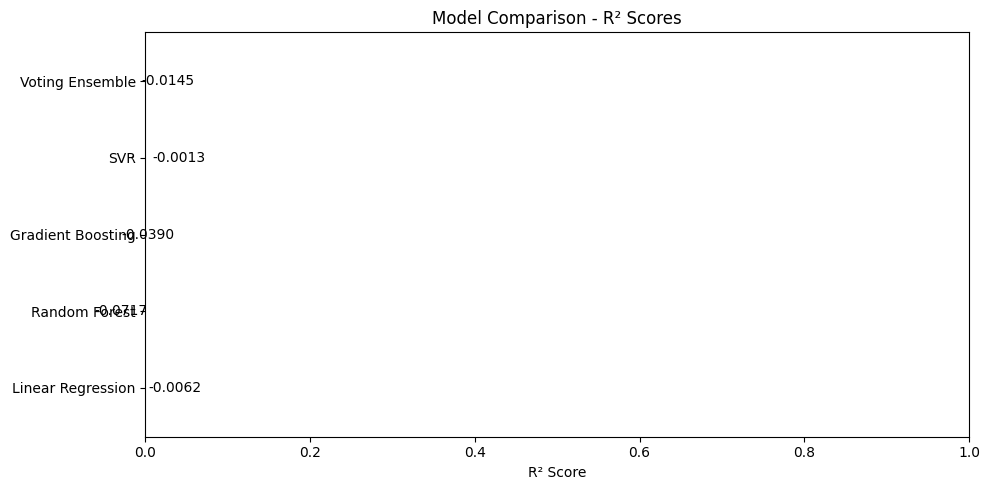

In [11]:
plt.figure(figsize=(10, 5))
models_list = model_names + ['Voting Ensemble']
r2_scores = model_r2 + [r2]
plt.barh(models_list, r2_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('R² Score')
plt.title('Model Comparison - R² Scores')
plt.xlim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

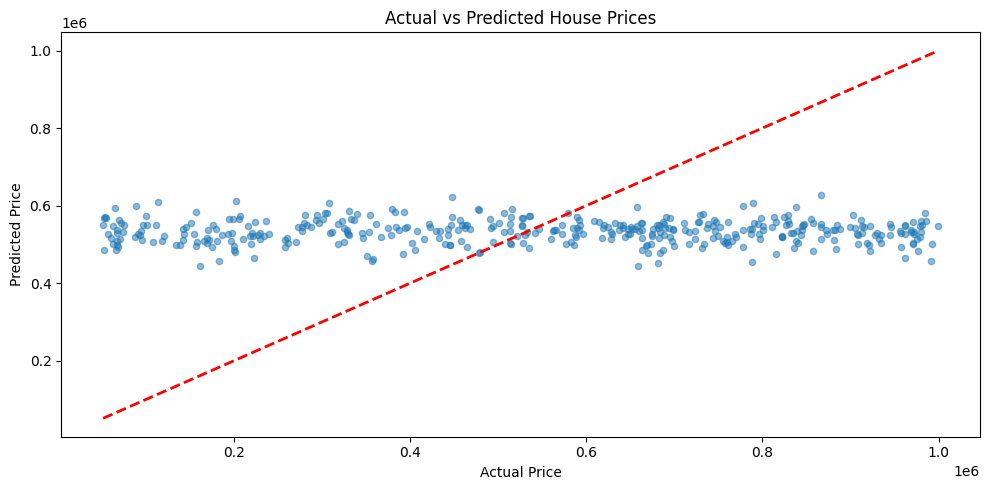

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

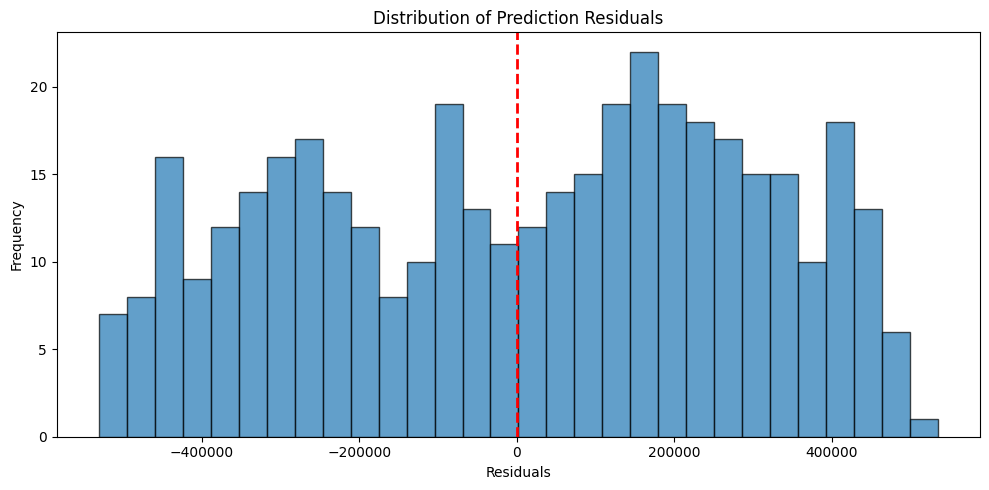


Residuals Statistics:
Mean: 10227.2093
Std Dev: 281109.3765


In [13]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Residuals')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.tight_layout()
plt.show()

print(f"\nResiduals Statistics:")
print(f"Mean: {residuals.mean():.4f}")
print(f"Std Dev: {residuals.std():.4f}")

Thanks!